In [17]:
%matplotlib inline
import pymysql
import os
import re
import copy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from lxml import etree
import json
import time

In [2]:
connection = pymysql.connect(host='127.0.0.1',
                             user='data',
                             password='data',
                             db='mag-new-160205',
                             charset='utf8mb4',
                             port=3306,
                             cursorclass=pymysql.cursors.DictCursor)
cursor = connection.cursor()

In [3]:
author_name_set = set()
data_folder = 'data'
link_data_file_name = 'links_10000'
link_data = open(os.path.join(data_folder, link_data_file_name+'.txt'), 'r')
for line in link_data:
    aus = line.split('\t')[:2]
    for au in aus:
        author_name_set.add(au.replace('_', ' '))
print (len(author_name_set))

7945


In [4]:
search_id_str = "SELECT AuthorID FROM Authors WHERE AuthorName = '%s'"
# search_fos_str = "SELECT AuthorFOS.FieldOfStudyIDMappedToKeyword, \
#                                 FieldsOfStudy.FieldsOfStudyName, \
#                                 FieldsOfStudy.FieldsOfStudyLevel \
#                                 FROM AuthorFOS, FieldsOfStudy WHERE \
#                                 AuthorFOS.AuthorID = '%s' and FieldsOfStudy.FieldsOfStudyID = AuthorFOS.FieldOfStudyIDMappedToKeyword"
search_fos_str = "SELECT FieldOfStudyIDMappedToKeyword \
                                FROM AuthorFOS WHERE \
                                AuthorID = '%s' "
res_dict = {}
start = time.time()
for i, au in enumerate(author_name_set):
#     print (search_id_str % au)
    if (i+1)%500 == 0:
        print ('Process: %d, Time: %.3f', (i+1), time.time()-start)
        start = time.time()
    res_dict[au.replace(' ', '_')] = []
    cursor.execute(search_id_str % au)
    id_res = cursor.fetchall()
#     print ('len idres', len(id_res))
    if id_res:
        for id_row in id_res:
#             print ('idrow', id_row)
            cursor.execute(search_fos_str % id_row['AuthorID'])
            fos_res = cursor.fetchall()
#             print ('len fos_res', len(fos_res))
            if fos_res:
                for fos_row in fos_res:
#                     print ('fos_row', fos_row)
                    res_dict[au.replace(' ', '_')].append(fos_row['FieldOfStudyIDMappedToKeyword'])
#                     print (fos_row['FieldOfStudyIDMappedToKeyword'])
#     break


Process: %d, Time: %.3f 500 182.67347192764282
Process: %d, Time: %.3f 1000 164.84876227378845
Process: %d, Time: %.3f 1500 149.08687090873718
Process: %d, Time: %.3f 2000 158.160884141922
Process: %d, Time: %.3f 2500 151.90070414543152
Process: %d, Time: %.3f 3000 144.59556221961975
Process: %d, Time: %.3f 3500 153.99828386306763
Process: %d, Time: %.3f 4000 127.90542554855347
Process: %d, Time: %.3f 4500 126.81808304786682
Process: %d, Time: %.3f 5000 114.89902305603027
Process: %d, Time: %.3f 5500 119.75180172920227
Process: %d, Time: %.3f 6000 132.8612403869629
Process: %d, Time: %.3f 6500 133.934672832489
Process: %d, Time: %.3f 7000 117.97388339042664
Process: %d, Time: %.3f 7500 123.34813332557678


In [5]:
derive_file = open(os.path.join(data_folder, link_data_file_name+'_with_fos.txt'), 'w')
for k,v in res_dict.items():
    derive_file.write(k+'\t')
    for fos in v:
        derive_file.write(fos+' ')
    derive_file.write('\n')

In [6]:
derive_file.close()

In [13]:
import numpy as np
author_fos = {}
maxlen = 0
maxlen_name = ''
for k, v in res_dict.items():
    author_fos[len(v)] = author_fos.get(len(v), 0) + 1
    if len(v) > maxlen:
        maxlen = len(v)
        maxlen_name = k
fos_freq = sorted(author_fos.items(), key = lambda item:item[0])
fos_freq_x = [item[0] for item in fos_freq]
fos_freq_y = [item[1] for item in fos_freq]
# print (maxlen_name, maxlen)
# print (fos_freq_x)
# print (fos_freq_y)
print (author_fos.keys())
plt.hist(author_fos.keys())
# plt.bar(fos_freq_x, fos_freq_y, align='center')
# plt.xlabel('Grade')
# plt.ylabel('Frequency')
# plt.title('Frequency of FOS per name')
# plt.show()

dict_keys([0, 1, 2, 3, 4, 5, 6, 4097, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 4246, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 8904, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 6144, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 7, 217, 218, 

RuntimeError: Invalid DISPLAY variable

(array([  3.67000000e+03,   1.50300000e+03,   8.41000000e+02,
          5.40000000e+02,   3.21000000e+02,   2.17000000e+02,
          1.36000000e+02,   1.08000000e+02,   7.50000000e+01,
          5.90000000e+01,   4.90000000e+01,   3.60000000e+01,
          3.00000000e+01,   2.50000000e+01,   1.70000000e+01,
          2.00000000e+01,   1.30000000e+01,   2.00000000e+01,
          2.30000000e+01,   1.40000000e+01,   1.30000000e+01,
          1.40000000e+01,   1.90000000e+01,   1.20000000e+01,
          7.00000000e+00,   7.00000000e+00,   9.00000000e+00,
          9.00000000e+00,   2.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   8.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   8.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   7.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   1.00000000e+00,
        

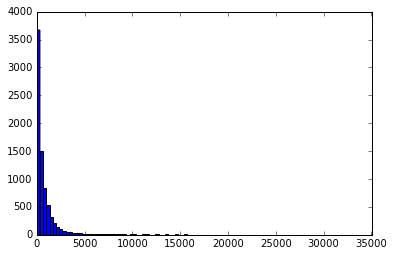

In [19]:
author_fos_f = []
for k, v in res_dict.items():
    author_fos_f.append(len(v))
plt.hist(np.array(author_fos_f), bins=100)